## Dataset com dados da COVID-19

* Link do dataset: https://covid.saude.gov.br/<br>
* Dataset Atualizado 22/04/2020

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

In [3]:
cv.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 7 columns):
regiao              2295 non-null object
estado              2295 non-null object
data                2295 non-null object
casosNovos          2295 non-null int64
casosAcumulados     2295 non-null int64
obitosNovos         2295 non-null int64
obitosAcumulados    2295 non-null int64
dtypes: int64(4), object(3)
memory usage: 125.6+ KB


In [5]:
cv.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2295.000000,2295.000000,2295.000000,2295.000000
mean,21.565142,261.319826,1.443573,14.887582
std,86.173676,1128.679019,7.507580,80.620974
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,9.000000,79.500000,0.000000,2.000000
max,1672.000000,16740.000000,211.000000,1345.000000


In [6]:
#criar um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())

#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

In [7]:
#Setando um grid
sns.set_style("darkgrid")

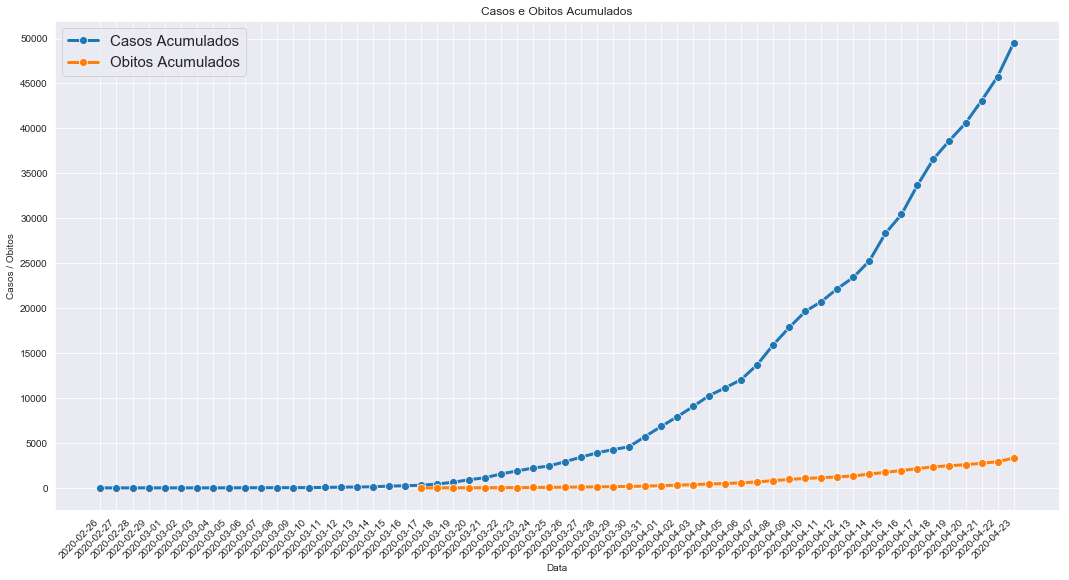

In [8]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5001,5000))
#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Casos / Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

              Casos Novos
regiao                   
Sudeste             25583
Nordeste            13381
Norte                5514
Sul                  3191
Centro-Oeste         1823


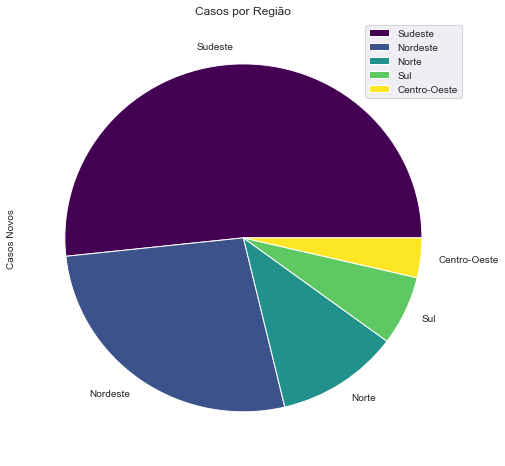

In [32]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Novos']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='viridis')
plt.title('Casos por Região')

plt.show()

              Obitos Novos
regiao                    
Sudeste               1968
Nordeste               832
Norte                  323
Sul                    128
Centro-Oeste            62


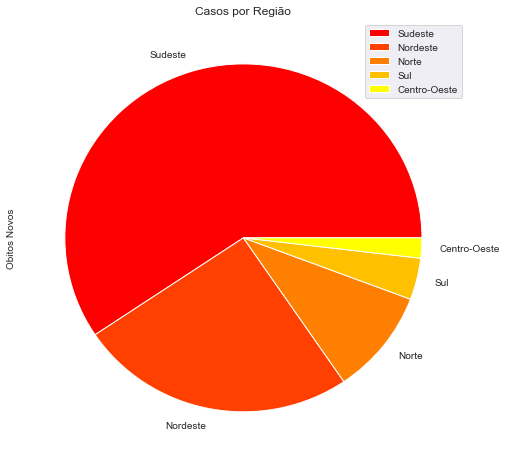

In [42]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Obitos Novos']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='autumn')
plt.title('Casos por Região')

plt.show()

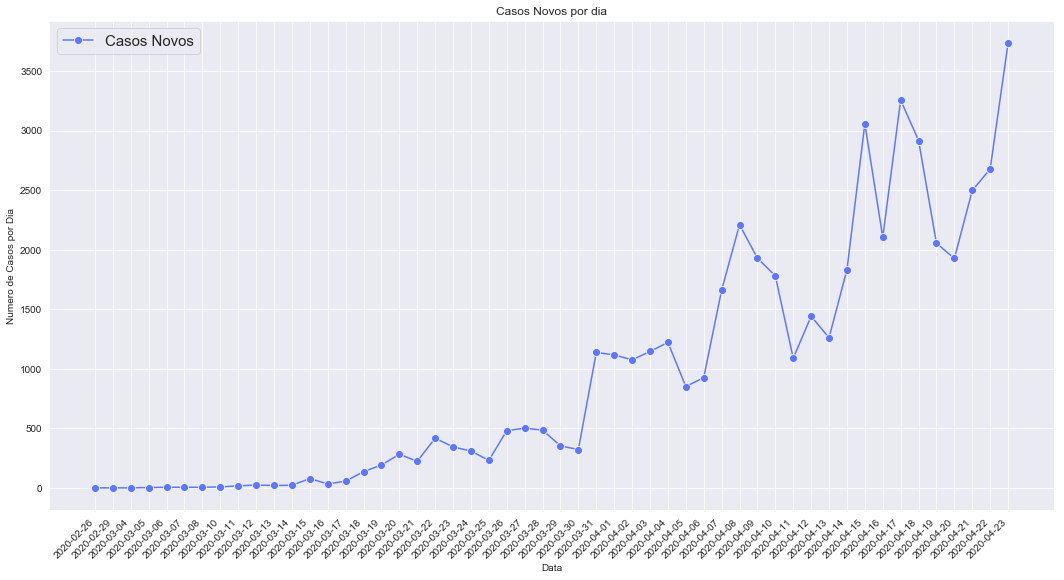

In [10]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] > 0]['casosNovos'],data=df_por_data,marker='o',
             markersize=8,color='#5D78FF',label='Casos Novos')
#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
plt.legend()

plt.show()

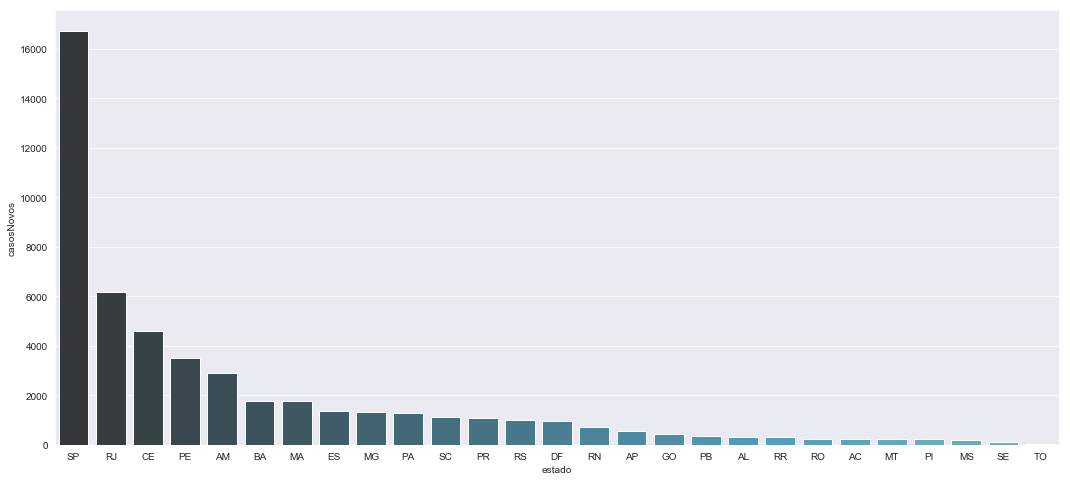

In [20]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("GnBu_d",n_colors=len(total_casos_por_estado)+12 ))

plt.show()

In [12]:
#Casos por semana

In [13]:
#Pensar em mais informações

# ------------------------------------------------------------------------------------<br>
### PERIGO ZONA DE TESTES<br>
# ------------------------------------------------------------------------------------

              Obitos Novos
regiao                    
Sudeste              25583
Nordeste             13381
Norte                 5514
Sul                   3191
Centro-Oeste          1823
              Obitos Novos
regiao                    
Sudeste               1968
Nordeste               832
Norte                  323
Sul                    128
Centro-Oeste            62


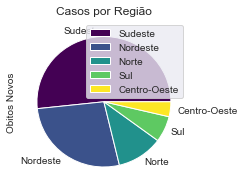

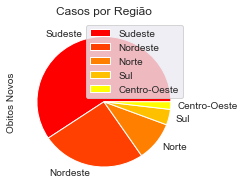

In [107]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Obitos Novos']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(3,3),cmap='viridis')
plt.title('Casos por Região')

#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Obitos Novos']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(3,3),cmap='autumn')
plt.title('Casos por Região')

plt.show()

### Trocar a cor do grafico abaixo

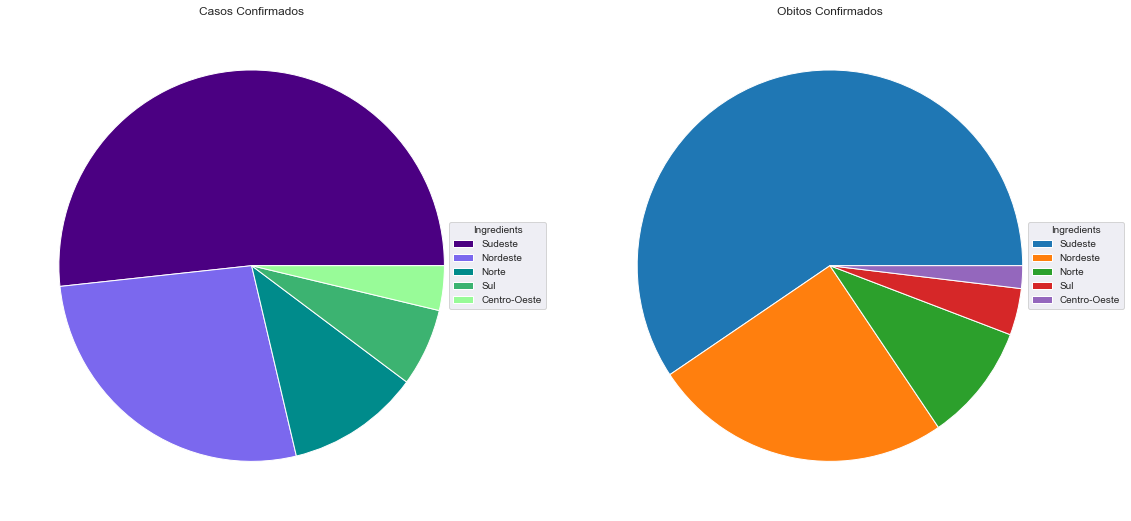

In [150]:
#Criação da legenda
legenda = total_casos_por_regiao.reset_index()

#Cria o eixo dos 2 plots
fig, axes = plt.subplots(1, 2, figsize=(19,9))

#PIE 1
axes[0].pie(cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
            ,colors=['#4B0082','#7B68EE','#008B8B','#3CB371','#98FB98'])
axes[0].set_title("Casos Confirmados")
#Criação da legenda
axes[0].legend(legenda['regiao'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0, 1))

#PIE 2
axes[1].pie(cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False))
axes[1].set_title("Obitos Confirmados");
#Criação da legenda
axes[1].legend(legenda['regiao'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))

plt.show()